In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
y = df.species
df = df.drop("species", axis=1)
cols = df.columns

In [14]:
df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df, columns=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [15]:
clusters = KMeans(
    init="k-means++",
    n_clusters=3, 
    n_init=10, 
    random_state=1, 
)

In [16]:
clusters.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [17]:
clusters.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=1)

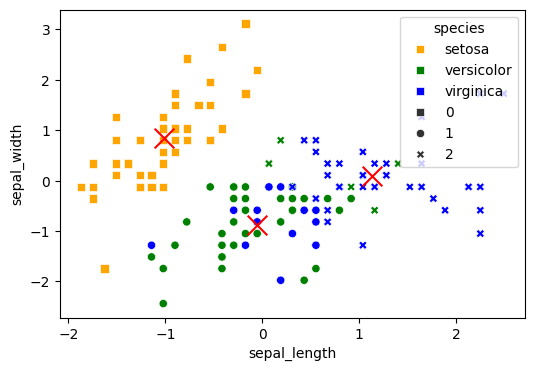

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    data=df,
    hue=y,
    style=clusters.labels_,
    palette=["orange", "green", "blue"], 
    markers=['s','o','X']
)

plt.scatter(
    clusters.cluster_centers_[:,0],
    clusters.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red'
)